In [9]:
#https://computational-discovery-on-jupyter.github.io/Computational-Discovery-on-Jupyter/Contents/continued-fractions.html

In [14]:
import sympy
from sympy.core import Rational, pi
from sympy import sqrt
from sympy.ntheory.continued_fraction import continued_fraction_iterator

import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
x0 = 1

for i in range(10):
    x1 = (x0 + 2/x0)/2
    print (x1, x1**2-2)
    x0 = x1

1.5 0.25
1.4166666666666665 0.006944444444444198
1.4142156862745097 6.007304882427178e-06
1.4142135623746899 4.510614104447086e-12
1.414213562373095 -4.440892098500626e-16
1.414213562373095 -4.440892098500626e-16
1.414213562373095 -4.440892098500626e-16
1.414213562373095 -4.440892098500626e-16
1.414213562373095 -4.440892098500626e-16
1.414213562373095 -4.440892098500626e-16


In [16]:
p0 = 1
q0 = 1

for i in range(10):
    p1 = p0**2 + 2*q0**2
    q1 = 2*p0*q0
    print( p1, q1, p1/q1, (p1/q1)**2-2, p1**2 - 2*q1**2, q1**2 )
    p0 =p1
    q0=q1

3 2 1.5 0.25 1 4
17 12 1.4166666666666667 0.006944444444444642 1 144
577 408 1.4142156862745099 6.007304882871267e-06 1 166464
665857 470832 1.4142135623746899 4.510614104447086e-12 1 221682772224
886731088897 627013566048 1.4142135623730951 4.440892098500626e-16 1 393146012008229658338304
1572584048032918633353217 1111984844349868137938112 1.4142135623730951 4.440892098500626e-16 1 1236510294063800469693771621893337765354742124544
4946041176255201878775086487573351061418968498177 3497379255757941172020851852070562919437964212608 1.4142135623730951 4.440892098500626e-16 1 12231661658605970488646702209964173639623045564667134286386925224636805727742126817029345426161664
48926646634423881954586808839856694558492182258668537145547700898547222910968507268117381704646657 34596363615919099765318545389014861517389860071988342648187104766246565694525469768325292176831232 1.4142135623730951 4.440892098500626e-16 1 119690837544489088758468786954108815659845274629810131366355731906298134069694257

In [26]:
# Compute and return successive elements of the continued fraction.
# For the base case with just one entry, return the correct a[1]/1 and 0 (could have been "undefined")
# Code translated by Maple's CodeGeneration[Python]
def forward (a):
    n = len(a)
    if n==0:
        return( 0, 0 )
    elif n==1:
        return(a[0], 0)
    else:
        p0 = a[0]
        q0 = 1
        p1 = a[1] * a[0] + 1
        q1 = a[1]
        for k in range(3, n + 1):
            p = a[k - 1] * p1 + p0
            q = a[k - 1] * q1 + q0
            p0 = p1
            p1 = p
            q0 = q1
            q1 = q
        return( p1/q1, p0/q0 )

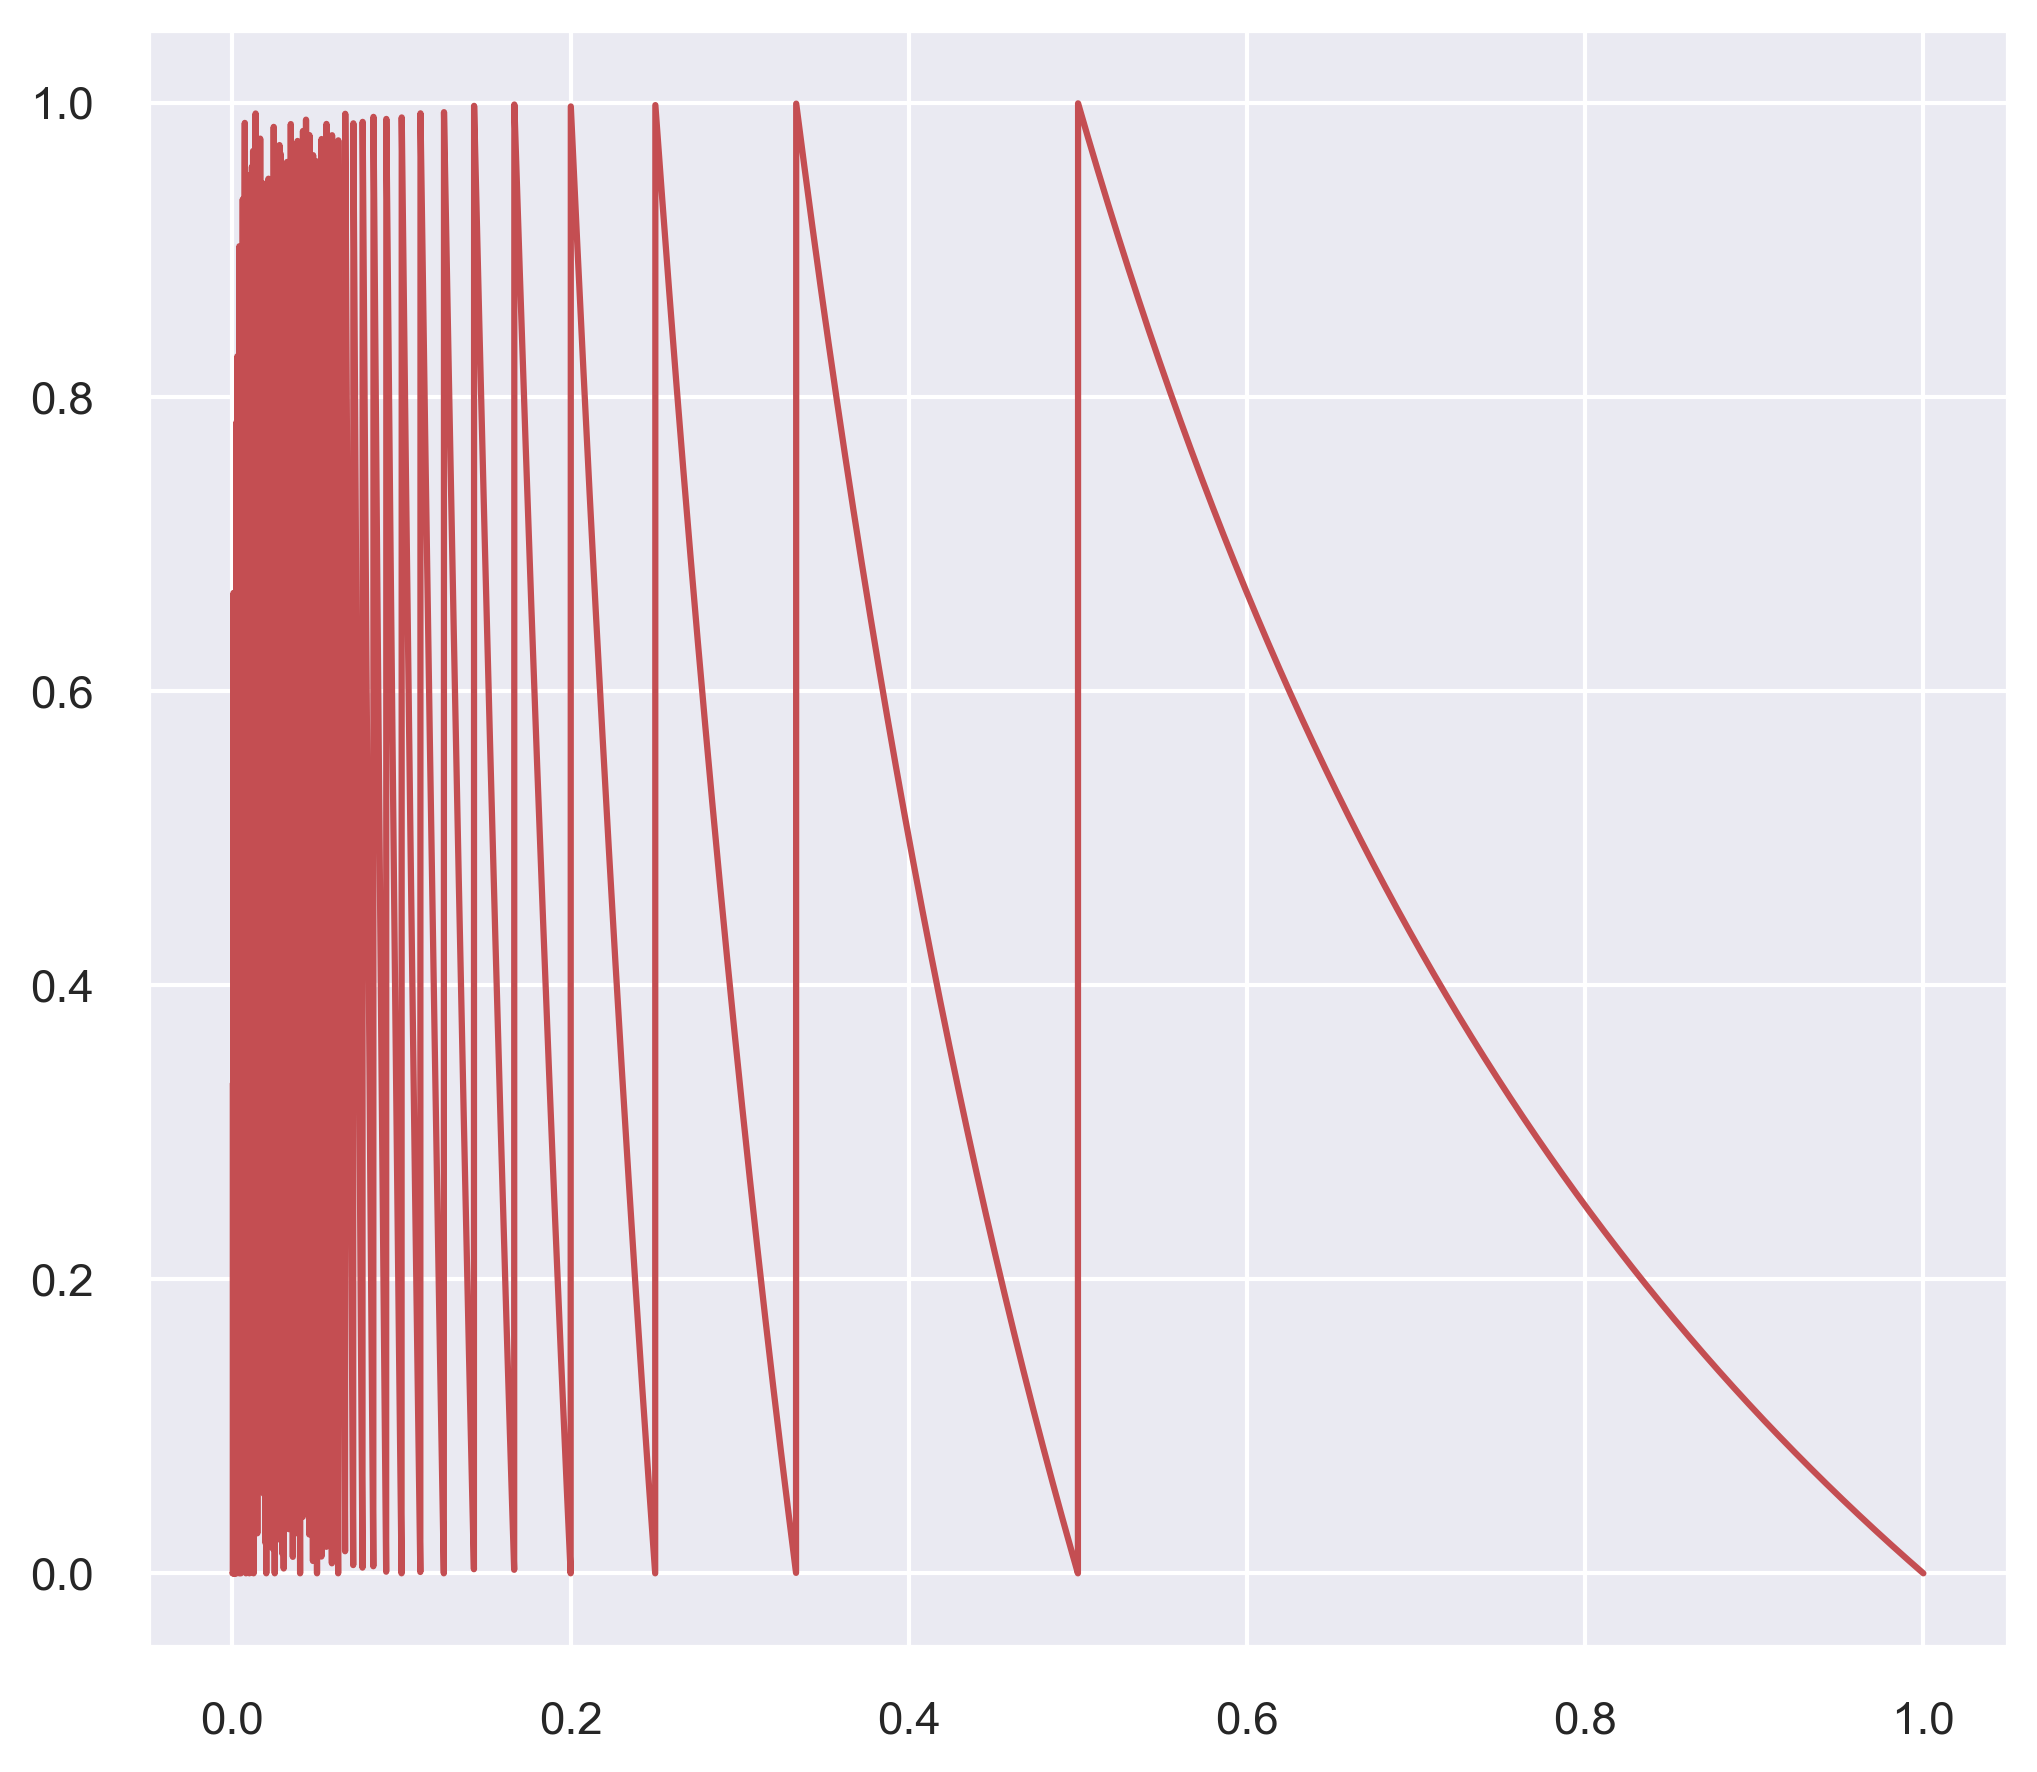

In [27]:

G = lambda x: math.modf(1/x)[0]
vecG = np.vectorize(G)
x = np.linspace(0, 1, 10001, dtype=float)
y = vecG(x[1:])
y = np.append(0, y)
plt.figure(dpi=300)
plt.plot(x, y, 'r')
sns.set_theme()
plt.show()

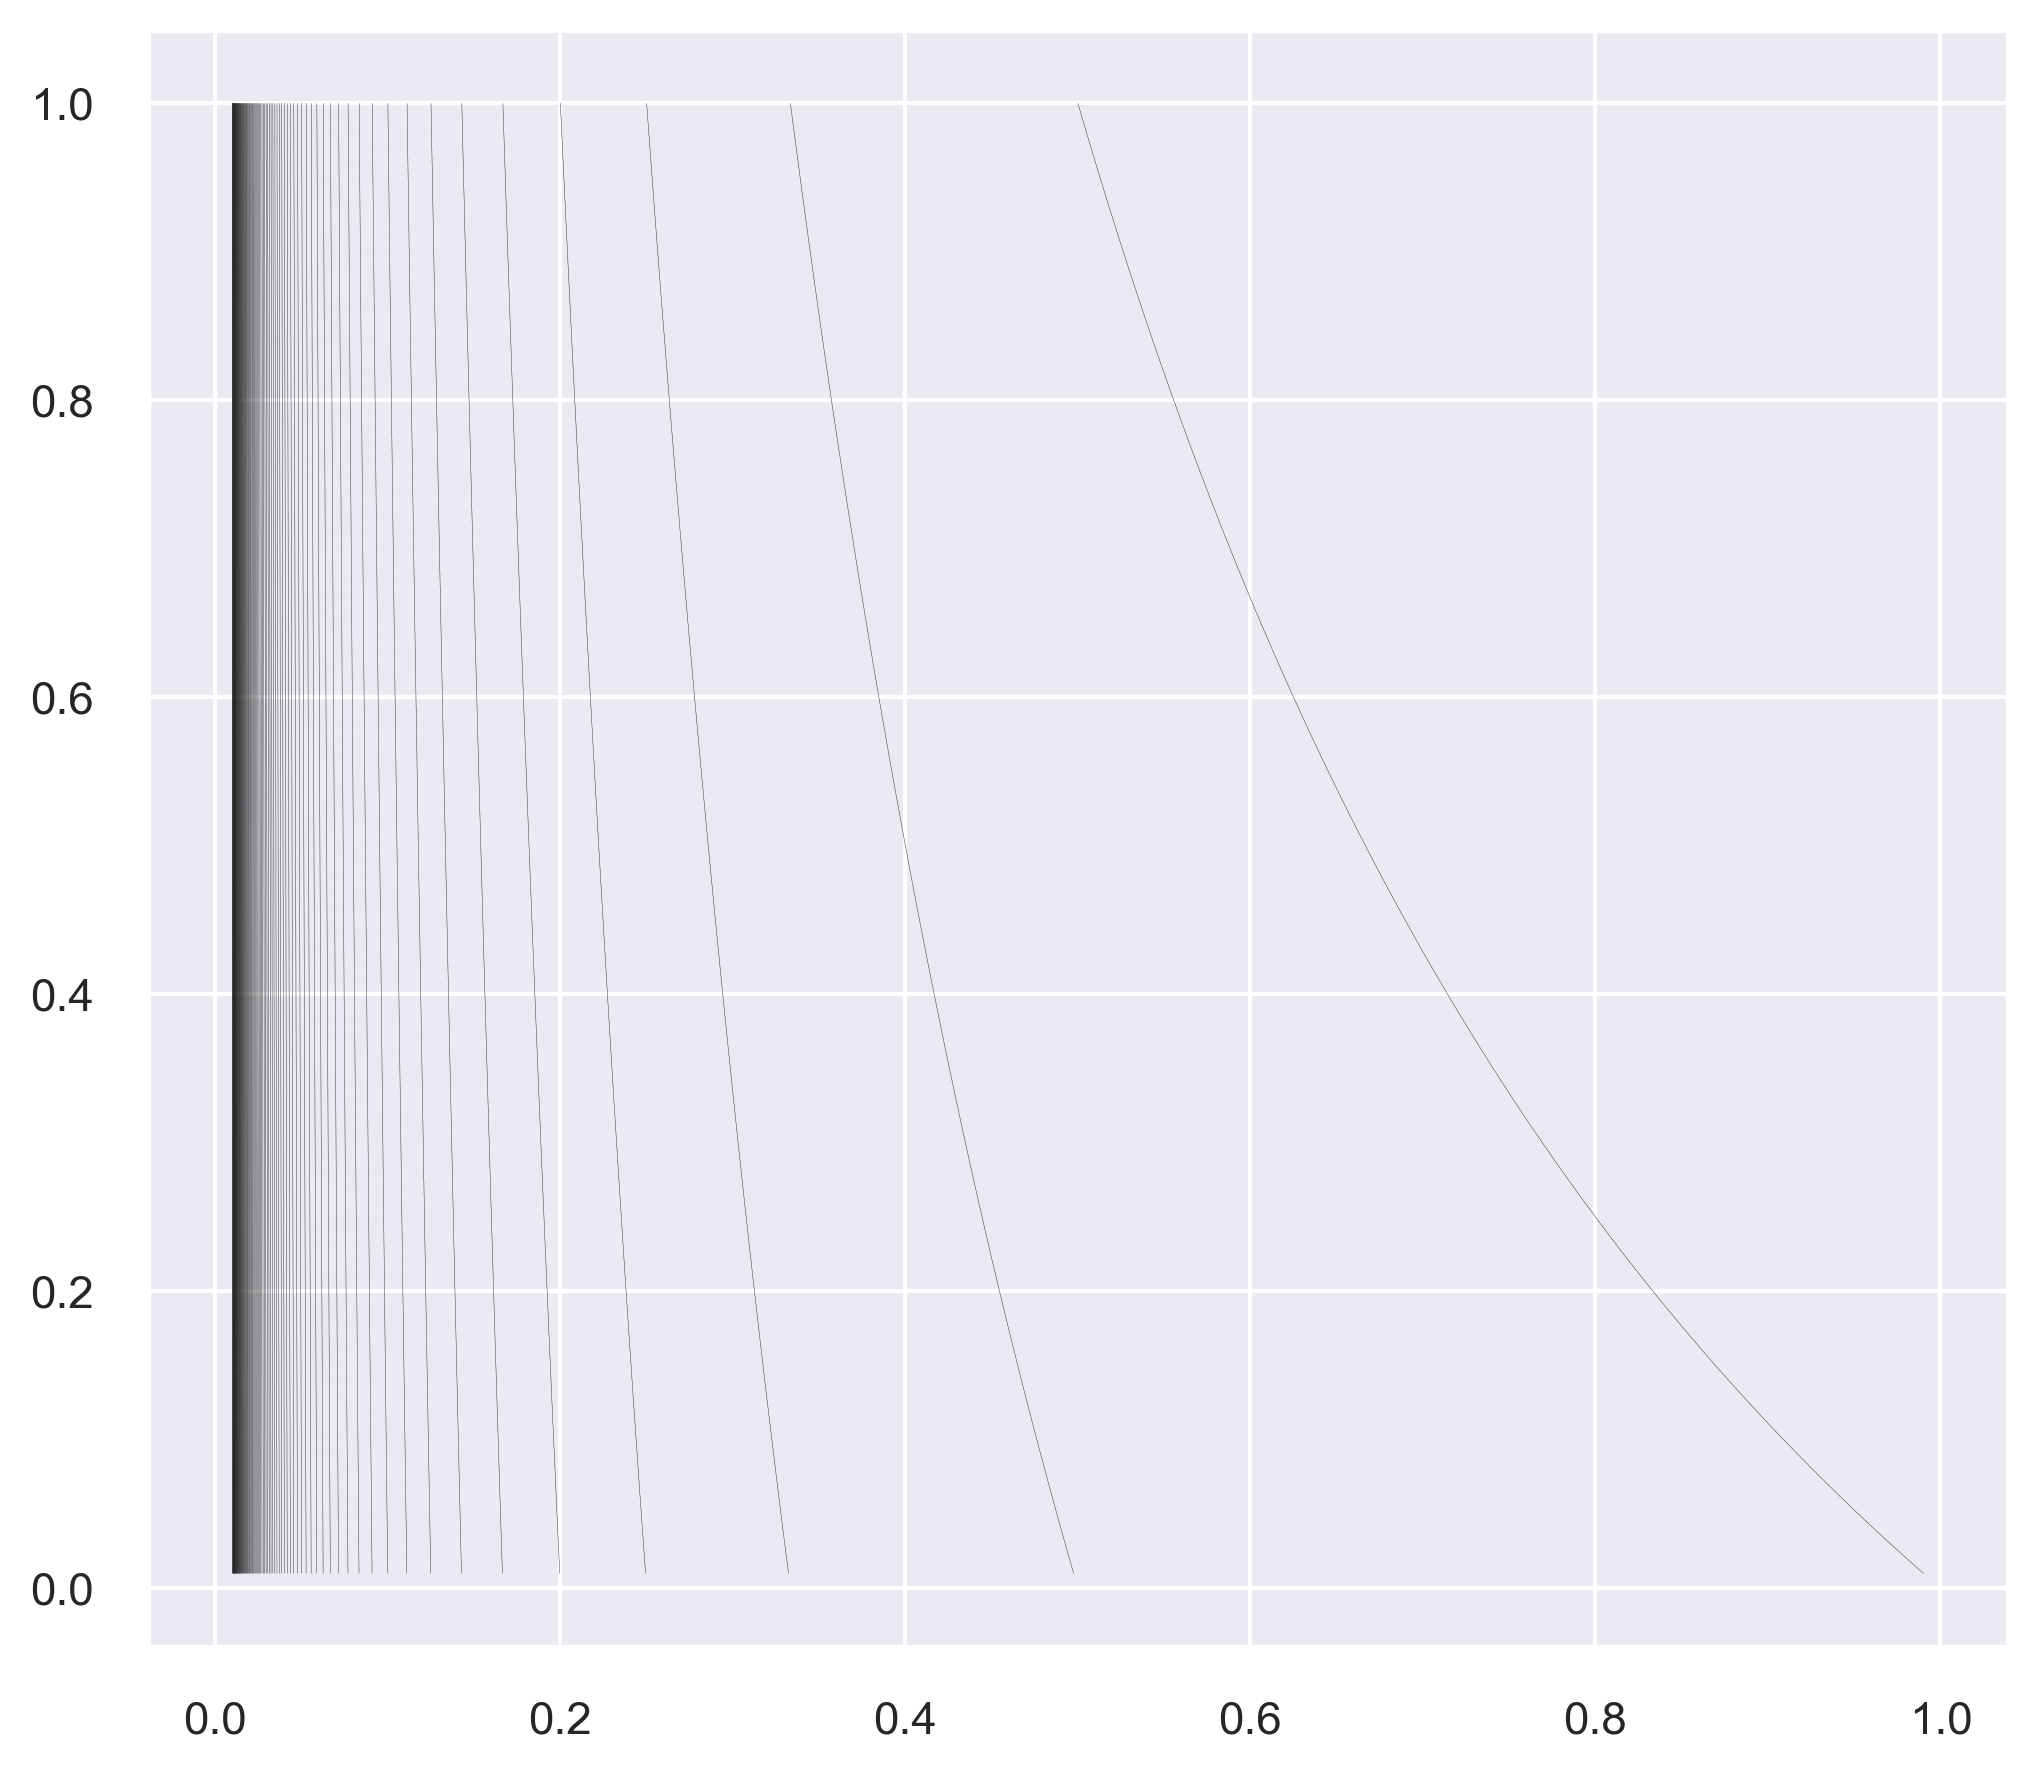

In [28]:
y = np.linspace(0,1,101, dtype=float)
recip = lambda t: 1.0/t
R = np.vectorize( recip )
y1 = y[1:]
N = 100
plt.figure(dpi=300)
for n in range(N):
    x = R(y1+n+1)
    plt.plot( x, y1, 'k', linewidth=0.1)
sns.set_theme()
    
plt.show()

In [29]:
N = 33333333333
x = sympy.Symbol('x')
eqn = (3*N + 1)*x**2 - 10*N*x - 10
sol = sympy.solve(eqn)
[sympy.N(z, 30) for z in sol]

[-3.00000000000299999999997600000e-11, 3.33333333333000000000003000000]

In [30]:
ex1,ex0 = forward( [1,2,3,4] ) 
print( ex1, ex0, ex1-ex0, 1/210 )

1.4333333333333333 1.4285714285714286 0.004761904761904745 0.004761904761904762
